<a href="https://colab.research.google.com/github/hukim1112/MLDL/blob/master/lecture9/Count_based_word_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

본 코드는 딥러닝 자연어처리 입문(https://wikidocs.net/24557)을 기반으로 서울시립대 공준석, 김민지가 작성.

In [ ]:
! pip install konlpy

In [2]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Total 91 (delta 0), reused 0 (delta 0), pack-reused 91
Unpacking objects: 100% (91/91), done.


In [3]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [4]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 67.8 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-12-12 10:23:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=r7xa%2FISoc21lOQVqKcUzPGUV6IQ%3

# **Intro**

>## 컴퓨터의 언어처리
---
<br/>
컴퓨터는 언어를 숫자로 계산한다.
<br/>
<br/>
일상언어를 숫자로 표현하는 것을 임베딩이라고 한다.
<br/>
<br/>

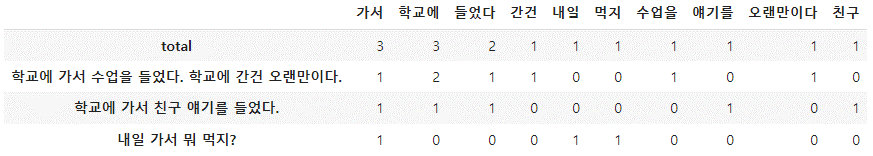

>## Tokenizer
---
<br/>

**오늘 수업은 빨리 끝날 것이다**
<br/>
<br/>

**[띄어쓰기 단위]**
<br/>
오늘, 수업은, 빨리, 끝날, 것이다.
<br/>
*끝난다, 끝났다, 끝날 것이다 등이 다 다르게 인식됨 → 단어사전이 매우 커짐*
<br/>
<br/>
**[문자 단위]**
<br/>
오, 늘, 수, 업, 은, 빨, 리, 끝, 날, 것, 이, 다
<br/>
*각 Token이 의미를 갖지 못함*
<br/>
<br/>
**[Subword 단위]**
<br/>
오늘, 수업, 은, 빨리, 끝날, 것, 이다
<br/>
*형태소로 구분 가능하지만 언어적 지식(프로그래밍)이 요구됨*


# **카운트 기반의 단어 표현**


---


자연어 처리에서 텍스트를 표현하는 방법으로는 여러가지 방법이 있습니다. 우리가 앞서 배운 n-gram 또한 텍스트를 표현하는 방법 중 하나입니다. 하지만 머신 러닝 등의 알고리즘이 적용된 본격적인 자연어 처리를 위해서는 문자를 숫자로 수치화할 필요가 있습니다.

### **1. 단어의 표현 방법**
---
<br/>
예를 들어 puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 단어가 있을 때 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여한다면 이는 국소 표현 방법에 해당됩니다. 반면, 분산 표현 방법의 예를 하나 들어보면 해당 단어를 표현하기 위해 주변 단어를 참고합니다. puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장하므로, puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의합니다. 이렇게 되면 이 두 방법의 차이는 국소 표현 방법은 단어의 의미, 뉘앙스를 표현할 수 없지만, 분산 표현 방법은 단어의 뉘앙스를 표현할 수 있게 됩니다.
<br/>
<br/>
또한 비슷한 의미로 국소 표현 방법(Local Representation)을 이산 표현(Discrete Representation)이라고도 하며, 분산 표현(Distributed Representation)을 연속 표현(Continuous Represnetation)이라고도 합니다.
<br/>
<br/>
다른 의견으로는, 구글의 연구원 토마스 미코로브(Tomas Mikolov)는 2016년에 한 발표에서 LSA나 LDA와 같은 방법들은 단어의 의미를 표현할 수 있다는 점에서 연속 표현(Continuous Represnetation)이지만, 엄밀히 말해서 다른 접근의 방법론을 사용하고 있는 워드투벡터(Word2vec)와 같은 분산 표현(Distributed Representation)은 아닌 것으로 분류하여 연속 표현을 분산 표현을 포괄하고 있는 더 큰 개념으로 설명하기도 했습니다.

### **2. 단어 표현의 카테고리화**
---
<br/>
이 책에서는 아래와 같은 기준으로 단어 표현을 카테고리화하여 작성되었습니다.
<br/>
<br/>

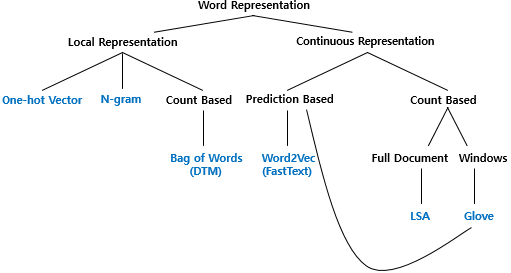

<br/>
<br/>
Bag of Words는 국소 표현에(Local Representation)에 속하며, 단어의 빈도수를 카운트(Count)하여 단어를 수치화하는 단어 표현 방법입니다. 이 챕터에서는 BoW와 그의 확장인 DTM(또는 TDM)에 대해서 학습하고, 이러한 빈도수 기반 단어 표현에 단어의 중요도에 따른 가중치를 줄 수 있는 TF-IDF에 대해서 학습합니다.
<br/>

# **1) Bag of Words(BoW)**
---
<br/>
이번 챕터에서는 단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현 방법인 Bag of Words에 대해서 학습합니다.

https://www.kaggle.com/competitions?searchQuery=nlp

### **1. Bag of Words란?**
---
<br/>
Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다. Bag of Words를 직역하면 단어들의 가방이라는 의미입니다. 단어들이 들어있는 가방을 상상해봅시다. 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣습니다. 그러고나서 이 가방을 흔들어 단어들을 섞습니다. 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됩니다. 또한 가방을 흔들어서 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.
<br/>
<br/>
BoW를 만드는 과정을 이렇게 두 가지 과정으로 생각해보겠습니다.
(1) 우선, 각 단어에 고유한 정수 인덱스를 부여합니다.
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.
<br/>
<br/>
한국어 예제를 통해서 BoW에 대해서 이해해보도록 하겠습니다.
문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.
<br/>
<br/>
위의 문서1에 대해서 BoW를 만들어보도록 하겠습니다. 아래의 코드는 입력된 문서에 대해서 단어 집합(vocaburary)을 만들어 인덱스를 할당하고, BoW를 만드는 코드입니다. 이 코드에 이번에 입력할 입력은 문서1입니다.

In [5]:
from konlpy.tag import Okt
import re  
okt = Okt()

In [13]:
text1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."


def bows(text):

    token = re.sub("(\.)","", text)
    # 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  

    token = okt.morphs(token)  
    # OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.

    word2index = {}
    bow = []
    
    for voca in token:
            if voca not in word2index.keys():
                word2index[voca] = len(word2index)
    # token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.

                bow.insert(len(word2index)-1,1)
    # BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.
            else:
                index = word2index.get(voca)
    # 재등장하는 단어의 인덱스를 받아옵니다.

                bow[index] = bow[index]+1
    # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)

    return print(word2index, "\n", bow)

In [14]:
bows(text1)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9} 
 [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


<br/>
문서1에 각 단어에 대해서 인덱스를 부여한 결과는 첫번째 출력 결과입니다. 문서1의 BoW는 두번째 출력 결과입니다. 두번째 출력 결과를 보면, 물가상승률의 인덱스는 4이며, 문서1에서 물가상승률은 2번 언급되었기 때문에 인덱스 4(다섯번째 값)에 해당하는 값이 2임을 알 수 있습니다. (원한다면 한국어에서 불용어에 해당되는 조사들 또한 제거하여 더 정제된 BoW를 만들 수도 있습니다.)

### **2. Bag of Words의 다른 예제들**
----
<br/>
앞서 언급했듯이, BoW에 있어서 중요한 것은 단어의 등장 빈도입니다. 단어의 순서. 즉, 인덱스의 순서는 전혀 상관없습니다. 문서1에 대한 인덱스 할당을 임의로 바꾸고 그에 따른 BoW를 만든다고 해봅시다.

In [15]:
# ('발표': 0, '가': 1, '정부': 2, '하는': 3, '소비자': 4, '과': 5, '물가상승률': 6, '느끼는': 7, '은': 8, '다르다': 9)  
[1, 2, 1, 1, 1, 1, 2, 1, 1, 1]  

[1, 2, 1, 1, 1, 1, 2, 1, 1, 1]

<br/>
위의 BoW는 단지 단어들의 인덱스만 바뀌었을 뿐이며, 개념적으로는 여전히 앞서 만든 BoW와 동일한 BoW로 취급할 수 있습니다.
<br/>
<br/>

**문서2 : 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.**

<br/>
만약, 위의 코드에 문서2로 입력으로 하여 인덱스 할당과 BoW를 만드는 것을 진행한다면 아래와 같은 결과가 나옵니다.

In [16]:
text2 = "소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다."
bows(text2)

{'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10} 
 [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


<br/>
문서1과 문서2를 합쳐서 (이를 문서3이라고 명명합시다.) BoW를 만들 수도 있습니다.
<br/>
<br/>

**문서3: 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.**

<br/>
위의 코드에 문서3을 입력으로 하여 인덱스 할당과 BoW를 만든다면 아래와 같은 결과가 나옵니다.

In [17]:
text3 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다."
bows(text3)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17} 
 [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


<br/>
문서3 단어 집합에서 물가상승률이라는 단어는 인덱스가 4에 해당됩니다. 물가상승률이라는 단어는 문서1에서는 2회 등장하며, 문서2에서는 1회 등장하였기 때문에 두 BoW의 인덱스 4의 값은 각각 2와 1이 되는 것을 볼 수 있습니다.
<br/>
<br/>
BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에, 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다. 즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰입니다. 가령, '달리기', '체력', '근력'과 같은 단어가 자주 등장하면 해당 문서를 체육 관련 문서로 분류할 수 있을 것이며, '미분', '방정식', '부등식'과 같은 단어가 자주 등장한다면 수학 관련 문서로 분류할 수 있습니다.

### **3. CountVectorizer 클래스로 BoW 만들기**
---
<br/>
사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원합니다. 이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있습니다. CountVectorizer로 간단하고 빠르게 BoW를 만드는 실습을 진행해보도록 하겠습니다.



In [18]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


<br/>
예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며, 그 외의 값에서는 1의 값을 가지는 것을 볼 수 있습니다. 또한 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문입니다. 정제(Cleaning) 챕터에서 언급했듯이, 영어에서는 길이가 짧은 문자를 제거하는 것 또한 전처리 작업으로 고려되기도 합니다.
<br/>
<br/>
주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점입니다. 이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미합니다.
<br/>
<br/>
예를 들어, 앞서 BoW를 만드는데 사용했던 '정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.' 라는 문장을 CountVectorizer를 사용하여 BoW로 만들 경우, CountVectorizer는 '물가상승률'이라는 단어를 인식하지 못 합니다. CountVectorizer는 띄어쓰기를 기준으로 분리한 뒤에 '물가상승률과'와 '물가상승률은' 으로 조사를 포함해서 하나의 단어로 판단하기 때문에 서로 다른 두 단어로 인식합니다. 그리고 '물가상승률과'와 '물가상승률은'이 각자 다른 인덱스에서 1이라는 빈도의 값을 갖게 됩니다.

### **4. BOW의 문제점**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
corpus = ["It's good, not bad at all.",
         "It's bad, not good at all."]

In [21]:
vect = CountVectorizer()
vect.fit(corpus)

CountVectorizer()

In [22]:
vect.vocabulary_

{'all': 0, 'at': 1, 'bad': 2, 'good': 3, 'it': 4, 'not': 5}

In [23]:
import pandas as pd
bows = vect.transform(corpus)
df = pd.DataFrame(bows.toarray(), columns=vect.get_feature_names(), index=corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
df

,all,at,bad,good,it,not
"It's good, not bad at all.",1,1,1,1,1,1
"It's bad, not good at all.",1,1,1,1,1,1


### **5. BOW 실습**

#### **Text 파일을 통한 BOW 생성 (Sklearn CountVectorizer)**

In [28]:
text = ['예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며, 그 외의 값에서는 1의 값을 가지는 것을 볼 수 있습니다. ',
 '또한 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문입니다.',
 '정제(Cleaning) 챕터에서 언급했듯이, 영어에서는 길이가 짧은 문자를 제거하는 것 또한 전처리 작업으로 고려되기도 합니다.',
 '주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점입니다.',
 '이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미합니다.',
 "예를 들어, 앞서 BoW를 만드는데 사용했던 '정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.' 라는 문장을 CountVectorizer를 사용하여 BoW로 만들 경우, CountVectorizer는 '물가상승률'이라는 단어를 인식하지 못 합니다.",
 "CountVectorizer는 띄어쓰기를 기준으로 분리한 뒤에 '물가상승률과'와 '물가상승률은' 으로 조사를 포함해서 하나의 단어로 판단하기 때문에 서로 다른 두 단어로 인식합니다.",
 "그리고 '물가상승률과'와 '물가상승률은'이 각자 다른 인덱스에서 1이라는 빈도의 값을 갖게 됩니다."]

In [29]:
vect = CountVectorizer()
vect.fit(text)

CountVectorizer()

In [30]:
vect.vocabulary_

{'1의': 0,
 '1이라는': 1,
 '2와': 2,
 '2의': 3,
 '2이상인': 4,
 '4에서': 5,
 'bow가': 6,
 'bow로': 7,
 'bow를': 8,
 'cleaning': 9,
 'countvectorizer가': 10,
 'countvectorizer는': 11,
 'countvectorizer를': 12,
 'i는': 13,
 'love는': 14,
 'you와': 15,
 '가지는': 16,
 '가지며': 17,
 '각각': 18,
 '각자': 19,
 '값에서는': 20,
 '값을': 21,
 '갖게': 22,
 '것은': 23,
 '것을': 24,
 '경우': 25,
 '고려되기도': 26,
 '과정에서': 27,
 '그리고': 28,
 '기본적으로': 29,
 '기준으로': 30,
 '길이가': 31,
 '낮은': 32,
 '느끼는': 33,
 '다르다': 34,
 '다른': 35,
 '단어로': 36,
 '단어를': 37,
 '단지': 38,
 '대해서만': 39,
 '됩니다': 40,
 '뒤에': 41,
 '들어': 42,
 '등의': 43,
 '때문에': 44,
 '때문입니다': 45,
 '또한': 46,
 '띄어쓰기를': 47,
 '띄어쓰기만으로': 48,
 '띄어쓰기만을': 49,
 '라는': 50,
 '만드는': 51,
 '만드는데': 52,
 '만든다는': 53,
 '만들': 54,
 '만들어지지': 55,
 '문자를': 56,
 '문자에': 57,
 '문장에서': 58,
 '문장을': 59,
 '문제가': 60,
 '물가상승률': 61,
 '물가상승률과': 62,
 '물가상승률은': 63,
 '발표하는': 64,
 '번씩': 65,
 '분리한': 66,
 '빈도의': 67,
 '사라졌는데': 68,
 '사용하여': 69,
 '사용했던': 70,
 '서로': 71,
 '소비자가': 72,
 '수준의': 73,
 '수행되기': 74,
 '않음을': 75,
 '알파벳': 76,
 '앞서': 77,
 '언급되었

In [31]:
bows = vect.transform(text)
df = pd.DataFrame(bows.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
df

,1의,1이라는,2와,2의,2이상인,4에서,bow가,bow로,bow를,cleaning,countvectorizer가,countvectorizer는,countvectorizer를,i는,love는,you와,가지는,가지며,각각,각자,값에서는,값을,갖게,것은,것을,경우,고려되기도,과정에서,그리고,기본적으로,기준으로,길이가,낮은,느끼는,다르다,다른,단어로,단어를,단지,대해서만,...,없지만,영어에서는,영어의,예를,예제,외의,으로,의미합니다,이는,이라는,이유로,인덱스,인덱스에서,인식하기,인식하지,인식합니다,있습니다,자르는,작업으로,적용하면,전처리,점입니다,정부가,정제,제거하는,제대로,조사,조사를,주의할,진행하고,짧은,챕터에서,토큰으로,토큰화가,토큰화를,판단하기,포함해서,하나의,한국어에,합니다
0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### **Mecab으로 한글 토큰화 후 BOW 생성**

In [ ]:
# ! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 

In [ ]:
# cd Mecab-ko-for-Google-Colab

In [ ]:
# ! bash install_mecab-ko_on_colab190912.sh

In [36]:
from konlpy.tag import Mecab
import re
import pandas as pd
mecab = Mecab()

In [33]:
text_pd = pd.DataFrame(text)
text_pd

,0
0,예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 ...
1,"또한 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectori..."
2,"정제(Cleaning) 챕터에서 언급했듯이, 영어에서는 길이가 짧은 문자를 제거하는..."
3,주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는...
4,이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 C...
5,"예를 들어, 앞서 BoW를 만드는데 사용했던 '정부가 발표하는 물가상승률과 소비자가..."
6,CountVectorizer는 띄어쓰기를 기준으로 분리한 뒤에 '물가상승률과'와 '...
7,그리고 '물가상승률과'와 '물가상승률은'이 각자 다른 인덱스에서 1이라는 빈도의 값...


In [38]:
corpus = text_pd[0].apply(lambda x:mecab.nouns(x))
corpus

0           [제, 문장, 번, 언급, 인덱스, 인덱스, 값, 외, 값, 값, 것, 수]
1             [알파벳, 과정, 이, 기본, 길이, 이상, 문자, 토큰, 인식, 때문]
2         [정제, 챕터, 언급, 영어, 길이, 문자, 제거, 것, 전처리, 작업, 고려]
3                       [주의, 것, 기준, 단어, 수준, 토큰, 진행, 점]
4    [이, 영어, 경우, 토큰, 수행, 때문, 문제, 한국어, 적용, 조사, 등, 이유...
5    [예, 사용, 정부, 발표, 물가, 승률, 소비자, 물가, 상승, 문장, 사용, 경...
6    [띄어쓰기, 기준, 분리, 뒤, 물가, 승률, 물가, 상승, 으로, 조사, 포함, ...
7                         [물가, 승률, 물가, 상승, 인덱스, 빈도, 값]
Name: 0, dtype: object

In [39]:
from nltk import FreqDist #FreqDist는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.

In [40]:
FreqDist(corpus[0])

FreqDist({'값': 3,
          '것': 1,
          '문장': 1,
          '번': 1,
          '수': 1,
          '언급': 1,
          '외': 1,
          '인덱스': 2,
          '제': 1})

In [44]:
defalutdict = {}
for i in range(len(corpus)):
    defalutdict[i] = FreqDist(corpus[i])

In [45]:
defalutdict

{0: FreqDist({'값': 3,
           '것': 1,
           '문장': 1,
           '번': 1,
           '수': 1,
           '언급': 1,
           '외': 1,
           '인덱스': 2,
           '제': 1}),
 1: FreqDist({'과정': 1,
           '기본': 1,
           '길이': 1,
           '때문': 1,
           '문자': 1,
           '알파벳': 1,
           '이': 1,
           '이상': 1,
           '인식': 1,
           '토큰': 1}),
 2: FreqDist({'것': 1,
           '고려': 1,
           '길이': 1,
           '문자': 1,
           '언급': 1,
           '영어': 1,
           '작업': 1,
           '전처리': 1,
           '정제': 1,
           '제거': 1,
           '챕터': 1}),
 3: FreqDist({'것': 1,
           '기준': 1,
           '단어': 1,
           '수준': 1,
           '점': 1,
           '주의': 1,
           '진행': 1,
           '토큰': 1}),
 4: FreqDist({'경우': 1,
           '등': 1,
           '때문': 1,
           '문제': 1,
           '수행': 1,
           '영어': 1,
           '의미': 1,
           '이': 1,
           '이유': 1,
           '적용': 1,
           '조사': 1,
      

#### **DataFrame 생성**

In [46]:
df = pd.DataFrame.from_dict(defalutdict, orient='index') #dictionary들의 index를 column으로 만듦.
df = df.fillna(0)
df

,제,문장,번,언급,인덱스,값,외,것,수,알파벳,과정,이,기본,길이,이상,문자,토큰,인식,때문,정제,챕터,영어,제거,전처리,작업,고려,주의,기준,단어,수준,진행,점,경우,수행,문제,한국어,적용,조사,등,이유,의미,예,사용,정부,발표,물가,승률,소비자,상승,띄어쓰기,분리,뒤,으로,포함,하나,판단,빈도
0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


# **2) 문서 단어 행렬(Document-Term Matrix, DTM)**

각 문서에 대한 BoW(빈도수 기반의 단어 표헌)표현 방법을 토대로, **서로 다른 문서들의 BoW들을 결합한 표현 방법인 문서 단어 행렬(Document-Term Matrix, DTM)** 표현 방법을 배워보겠습니다. 행과 열을 반대로 선택하면 TDM이라고 부르기도 합니다. 이렇게 하면 서로 다른 문서들을 비교할 수 있게 됩니다.

*   항목 추가
*   항목 추가




> ## **1. 문서 단어 행렬(Document-Term Matrix, DTM)의 표기법**

문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말합니다. 각 문서에 대한 단어의 빈도수(BoW)를 하나의 행렬로 만들고 BoW 표현을 다수의 문서에 대해 행렬로 표현함으로써 부르는 용어입니다. 예를 들어서 이렇게 4개의 문서가 있다고 합시다.

문서1 : 먹고 싶은 사과

문서2 : 먹고 싶은 바나나

문서3 : 길고 노란 바나나 바나나

문서4 : 저는 과일이 좋아요

이를 문서 단어 행렬로 표현하면 다음과 같습니다.

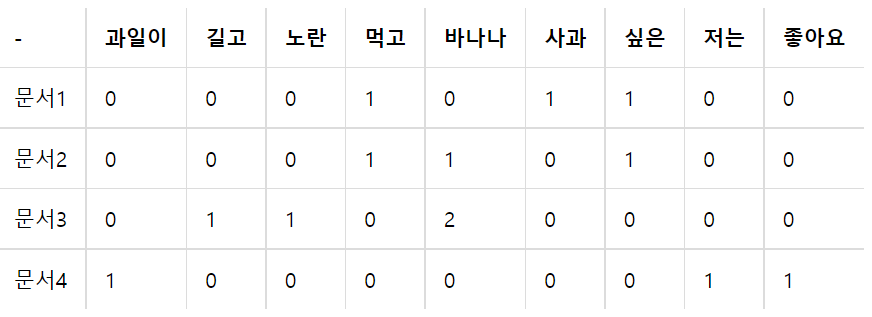

- 각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기 
- 문서 단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 갖음

> ## **2. 문서 단어 행렬(Document-Term Matrix)의 한계**

DTM은 매우 간단하고 구현하기도 쉽지만, 본질적으로 가지는 몇 가지 한계들이 있습니다.

###**1) 희소 표현(Sparse representation): 많은 양의 저장 공간과 계산을 위한 리소스가 필요**
원-핫 벡터는 단어 집합의 크기가 벡터의 차원이 되고 대부분의 값이 0이 된다는 특징이 있었습니다. 이 특징은 공간적 낭비와 계산 리소스를 증가시킬 수 있다는 점에서 원-핫 벡터의 단점이었습니다. DTM도 마찬가지입니다. DTM에서의 각 행을 문서 벡터라고 해봅시다. 각 문서 벡터의 차원은 원-핫 벡터와 마찬가지로 전체 단어 집합의 크기를 가집니다. **만약 가지고 있는 전체 코퍼스가 방대한 데이터라면 문서 벡터의 차원은 수백만의 차원을 가질 수도 있습니다.** 또한 많은 문서 벡터가 대부분의 값이 0을 가질 수도 있습니다. 당장 위에서 예로 들었던 문서 단어 행렬의 모든 행이 0이 아닌 값보다 0의 값이 더 많은 것을 볼 수 있습니다.


원-핫 벡터나 DTM과 같은 대부분의 값이 0인 표현을 희소 벡터(sparse vector) 또는 희소 행렬(sparse matrix)라고 부르는데, **희소 벡터는 많은 양의 저장 공간과 계산을 위한 리소스를 필요로 합니다. 이러한 이유로 전처리를 통해 단어 집합의 크기를 줄이는 일은 BoW 표현을 사용하는 모델에서 중요할 수 있습니다.**


 앞서 배운 텍스트 전처리 방법을 사용하여 구두점, 빈도수가 낮은 단어, 불용어를 제거하고, 어간이나 표제어 추출을 통해 단어를 정규화하여 단어 집합의 크기를 줄일 수 있습니다.

###**2) 단순 빈도 수 기반 접근: 유사 문서 판단 오류 발생 가능**
여러 문서에 등장하는 모든 단어에 대해서 빈도 표기를 하는 이런 방법은 때로는 한계를 가지기도 합니다. 예를 들어 영어에 대해서 DTM을 만들었을 때, 불용어인 the는 어떤 문서이든 자주 등장할 수 밖에 없습니다. 그런데 유사한 문서인지 비교하고 싶은 문서1, 문서2, 문서3에서 동일하게 the가 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단해서는 안 됩니다.


각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있습니다. 앞서 불용어(stopwords)는 자연어 처리에 있어 의미를 거의 갖지 못하는 단어라고 언급한 바 있습니다. 그렇다면 DTM에 불용어와 중요한 단어에 대해서 가중치를 줄 수 있는 방법은 없을까요? 이를 위해 사용하는 것이 다음 챕터에서 배우게 될 TF-IDF입니다.

# **3) TF-IDF(Term Frequency-Inverse Document Frequency)**

이번 챕터에서는 DTM 내에 있는 **각 단어에 대한 중요도를 계산**할 수 있는 TF-IDF 가중치에 대해서 알아보도록 하겠습니다. TF-IDF를 사용하면, 기존의 DTM을 사용하는 것보다 보다 더 많은 정보를 고려하여 문서들을 비교할 수 있습니다.


> ## **1. TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency)**

TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다. 사용 방법은 우선 DTM을 만든 후, TF-IDF 가중치를 부여합니다.

TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있습니다.

**TF-IDF는 TF와 IDF를 곱한 값을 의미**하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.

**(1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수**

: 생소한 글자때문에 어려워보일 수 있지만, 잘 생각해보면 TF는 이미 앞에서 구한 적이 있습니다. TF는 앞에서 배운 DTM의 예제에서 각 단어들이 가진 값들입니다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문입니다.

**(2) df(t) : 특정 단어 t가 등장한 문서의 수**
여기서 특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는 관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가집니다. 앞서 배운 DTM에서 바나나는 문서2와 문서3에서 등장했습니다. 이 경우, 바나나의 df는 2입니다. 문서3에서 바나나가 두 번 등장했지만, 그것은 중요한 게 아닙니다. 심지어 바나나란 단어가 문서2에서 100번 등장했고, 문서3에서 200번 등장했다고 하더라도 바나나의 df는 2가 됩니다.

**(3) idf(d, t) : df(t)에 반비례하는 수**

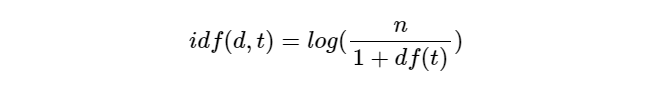


IDF라는 이름을 보고 DF의 역수가 아닐까 생각했다면, IDF는 DF의 역수를 취하고 싶은 것이 맞습니다. 그런데 log와 분모에 1을 더해주는 식에 의아하실 수 있습니다. **log를 사용하지 않았을 때, IDF를 DF의 역수로 사용한다면 총 문서의 수 n이 커질 수록, IDF의 값은 기하급수적으로 커지게 됩니다. 그렇기 때문에 log를 사용합니다.**

- df(d,t) = 0 -> 분모 = 0
 
  : 이를 방지하기 위해 분모에 1을 더해줌

왜 log가 필요한지 **n=1,000,000**일 때의 예를 들어봅시다. log의 밑은 10을 사용한다고 가정하였을 때 결과는 아래와 같습니다.

- idf(d,f)를 df의 역수에 로그를 취한 함수로 사용한 경우

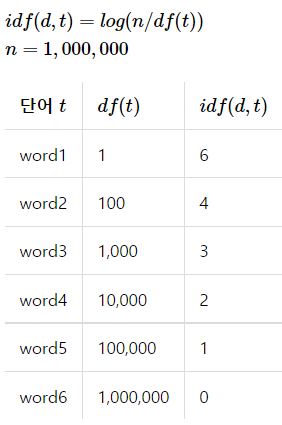

- idf(d,f)를 df의 역수로 사용한 경우

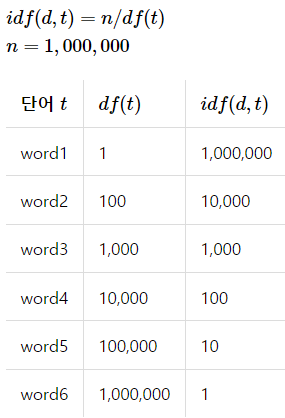




또 다른 직관적인 설명은 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장합니다. **그런데 비교적 자주 쓰이지 않는 단어들조차 희귀 단어들과 비교하면 또 최소 수백 배는 더 자주 등장하는 편입니다. 이 때문에 log를 씌워주지 않으면, 희귀 단어들에 엄청난 가중치가 부여될 수 있습니다.** 로그를 씌우면 이런 격차를 줄이는 효과가 있습니다.

**TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다.** TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.

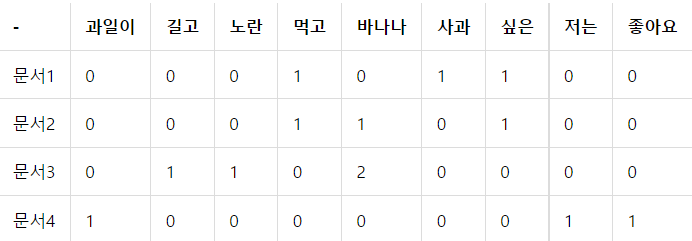

앞서 DTM을 설명하기위해 들었던 위의 예제를 가지고 TF-IDF에 대해 이해해보도록 하겠습니다. 우선 TF는 앞서 사용한 DTM을 그대로 사용하면, 그것이 각 문서에서의 각 단어의 TF가 됩니다.

그렇다면 이제 구해야할 것은 TF와 곱해야할 값인 IDF입니다. 로그는 자연 로그를 사용하도록 하겠습니다. IDF 계산을 위해 사용하는 로그의 밑은 TF-IDF를 사용하는 사용자가 임의로 정할 수 있습니다. 보통 각종 프로그래밍 언어나 프로그램에서 패키지로 지원하는 TF-IDF의 로그는 대부분 자연 로그를 사용합니다. 그렇기 때문에 저 또한 자연 로그를 사용하도록 하겠습니다. 자연 로그는 보통 log라고 표현하지 않고, ln이라고 표현합니다.

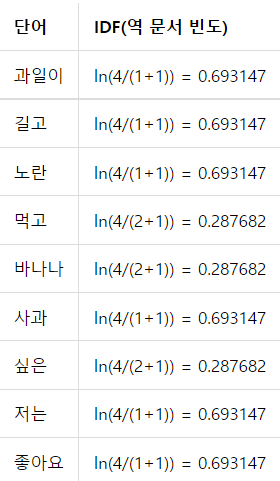

문서의 총 수는 4이기 때문에 ln 안에서 분자는 늘 4으로 동일합니다. 분모의 경우에는 각 단어가 등장한 문서의 수(DF)를 의미하는데, 예를 들어서 '먹고'의 경우에는 총 2개의 문서(문서1, 문서2)에 등장했기 때문에 2라는 값을 가집니다. 각 단어에 대해서 IDF의 값을 비교해보면 문서 1개에만 등장한 단어와 문서2개에만 등장한 단어는 값의 차이를 보입니다. **IDF는 여러 문서에서 등장한 단어의 가중치를 낮추는 역할을 하기 때문입니다.**

그러면 이제 TF-IDF(각 단어에 대한 중요도)를 계산해보도록 하겠습니다. TF는 DTM을 그대로 가져오면 각 문서에서의 각 단어의 TF를 가져오게 되기 때문에, 앞서 사용한 DTM에서 단어 별로 위의 IDF값을 그대로 곱해주면 TF-IDF가 나오게 됩니다.

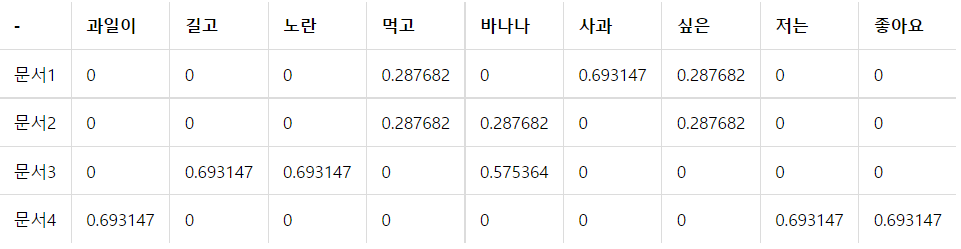

사실 예제 문서가 굉장히 간단하기 때문에 계산은 매우 쉽습니다. 문서3에서의 바나나만 TF 값이 2이므로 IDF에 2를 곱해주고, 나머진 TF 값이 1이므로 그대로 IDF 값을 가져오면 됩니다. 문서2에서의 바나나의 TF-IDF 가중치와 문서3에서의 바나나의 TF-IDF 가중치가 다른 것을 볼 수 있습니다. 수식적으로 말하면, TF가 각각 1과 2로 달랐기 때문인데 TF-IDF에서의 관점에서 보자면 TF-IDF는 특정 문서에서 자주 등장하는 단어는 그 문서 내에서 중요한 단어로 판단하기 때문입니다. 문서2에서는 바나나를 한 번 언급했지만, 문서3에서는 바나나를 두 번 언급했기 때문에 문서3에서의 바나나를 더욱 중요한 단어라고 판단하는 것입니다.

##**2. 파이썬으로 TF-IDF 직접 구현하기**

In [50]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

In [51]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [52]:
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [53]:
###TF, IDF, 그리고 TF-IDF 값을 구하는 함수를 구현
N = len(docs) # 총 문서의 수

def tf(t, d): ##특정 문서 d에서 특정 단어 t가 등장한 횟수
    return d.count(t)

def idf(t): ##df에 반비례하는 수
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t, d): ##td * idf
    return tf(t,d)* idf(t)

In [54]:
### TF 출력
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)): #문서별 단어의 빈도수 계산
        t = vocab[j]        
        result[-1].append(tf(t, d))
    print(result)

tf_ = pd.DataFrame(result, columns = vocab)
tf_

[[0, 0, 0, 1, 0, 1, 1, 0, 0]]
[[0, 0, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0, 0]]
[[0, 0, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0, 0], [0, 1, 1, 0, 2, 0, 0, 0, 0]]
[[0, 0, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0, 0], [0, 1, 1, 0, 2, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 1]]


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [55]:
###IDF 출력: 단어별로 출력
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [56]:
###TF-IDF 행렬 출력
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t,d)) ##코드 구성은 tf와 유사하나 사용함수가 상이

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


##**3. 사이킷런을 이용한 DTM과 TF-IDF 실습**

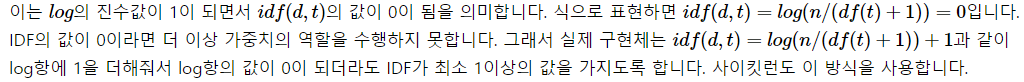

사이킷런을 통해 DTM과 TF-IDF를 만들어보겠습니다. BoW 챕터에서 배운 CountVectorizer를 사용하면 DTM을 만들 수 있습니다.


사이킷런의 TF-IDF는 위에서 배웠던 보편적인 TF-IDF 식에서 좀 더 조정된 다른 식을 사용합니다. 하지만 크게 다른 식은 아니며(IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이), 여전히 TF-IDF가 가진 의도를 그대로 갖고 있으므로 사이킷런의 TF-IDF를 그대로 사용하셔도 좋습니다.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다. -> 문서 단어 행렬(DTM)
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


In [60]:
### 사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.         0.         0.52640543 0.         0.66767854
  0.52640543 0.         0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.
  0.57735027 0.         0.        ]
 [0.         0.47212003 0.47212003 0.         0.7444497  0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.
  0.         0.57735027 0.57735027]]
{'먹고': 3, '싶은': 6, '사과': 5, '바나나': 4, '길고': 1, '노란': 2, '저는': 7, '과일이': 0, '좋아요': 8}


**TF-IDF계산**


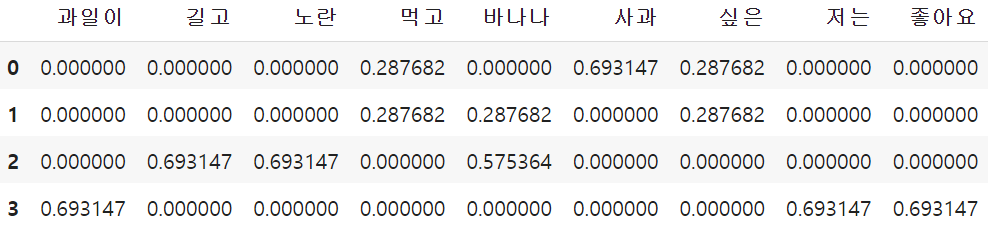

# End of Document